## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [13]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


# 1. Data Exploration
<ul>
<li>Examine the Size of DataSet</li>
<li>Determine the NULL Values</li>
<li>Numerical statisticks of the distribution</li>
</ul>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
#load the Data
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstons Projects/Exploratory Data Analysis/Telecom Churn.csv')

In [ ]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#visualize the data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### 1.1 Examine the size of Data

In [ ]:
#Examine the size of Data
data.shape

(3333, 20)

### 1.2 Determine the NULL Values

In [ ]:
#Determine the NULL Values
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### 1.3 Numerical statisticks of the distribution

In [ ]:
#Examine the DataSet
data[['Total day minutes','Total day charge',
     'Total eve minutes','Total eve charge',
     'Total night minutes','Total night charge',
     'Total intl minutes','Total intl charge']].describe()

,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,30.562307,200.980348,17.083540,200.872037,9.039325,10.237294,2.764581
std,54.467389,9.259435,50.713844,4.310668,50.573847,2.275873,2.791840,0.753773
min,0.000000,0.000000,0.000000,0.000000,23.200000,1.040000,0.000000,0.000000
25%,143.700000,24.430000,166.600000,14.160000,167.000000,7.520000,8.500000,2.300000
50%,179.400000,30.500000,201.400000,17.120000,201.200000,9.050000,10.300000,2.780000
75%,216.400000,36.790000,235.300000,20.000000,235.300000,10.590000,12.100000,3.270000
max,350.800000,59.640000,363.700000,30.910000,395.000000,17.770000,20.000000,5.400000


# 2. Univariate Visualization

## 2.1 Density plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


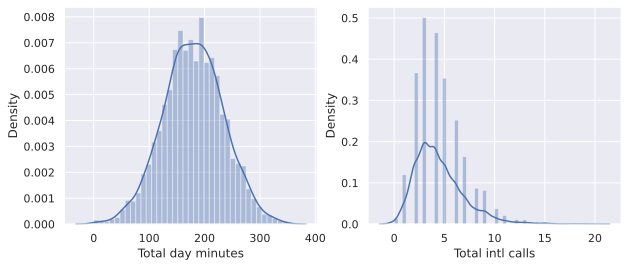

In [29]:
#Examine the Frequency Distribution
fig, ax = plt.subplots(figsize = (10,4))
plt.subplot(1,2, 1)
sns.distplot(data['Total day minutes'])
plt.subplot(1,2,2)
sns.distplot(data['Total intl calls'])

plt.ioff()

The shape of the histogram underlyning the type of the distribution of feature. Knowing the distribution type of features is very important when we use machine learning methods.   

In the above plot 'total day minutes' is normally distributed, but the 'total intl calls' is skewed right ( itis tail is longer on the right )

## 2.2 Identifying The Outliers

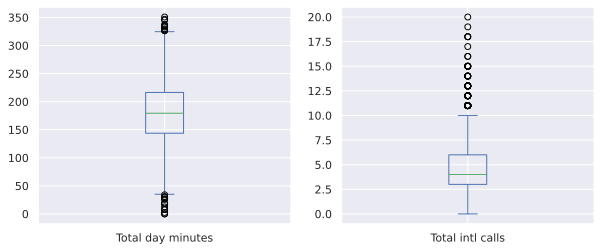

In [27]:
fig, ax = plt.subplots(figsize = (10,4))
plt.subplot(1,2, 1)
data['Total day minutes'].plot(kind='box')
# ax.set_xlabel('Total day minutes')
plt.subplot(1,2,2)
data['Total intl calls'].plot(kind='box')

plt.ioff()

The values that are fall out of the range , represented by black circles are called outliers.
we can see that the international call are low in our data

## 2.3 Frequency table
Let's we check the distribution of our target Variable for that I
plot barchart of target variable.
After target variable I plot barchart for Customer Service call variable


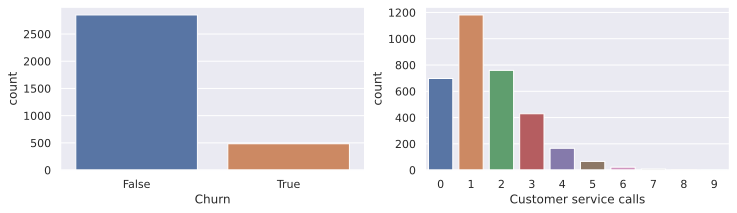

In [118]:
fig, ax = plt.subplots(figsize=(12,3))
plt.subplot(1,2,1)
sns.countplot(x='Churn',data=data)

plt.subplot(1,2,2)
sns.countplot(x='Customer service calls',data=data)
plt.ioff()

In the above left plot we can see that small portion of customer is dissatisfied. 
And By right plot it seems that most of the customers problems are solved in 2-3 calls.
It just hypotheses for now. So let's move forward for futher visualizations

# 3. Multivariate Visualization

## 3.1 Correlation 

In [ ]:
#Correlation Matrix
corr_df = data.iloc[0:, 5:-2]
corr_df.corr()

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
Number vmail messages,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884
Total day minutes,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092
Total day calls,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666
Total day charge,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094
Total eve minutes,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067
Total eve calls,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674
Total eve charge,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074
Total night minutes,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180
Total night calls,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630
Total night charge,0.007663,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186


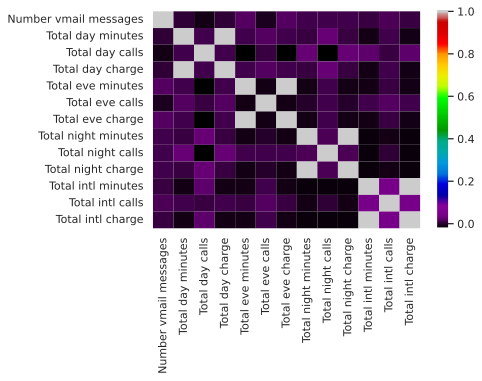

In [ ]:
#Correlation HeatMap
sns.heatmap(corr_df.corr(),cmap= 'nipy_spectral')
plt.ioff()

*Since the 'Total day charge', 'Total eve charge', 'Total night charge' & 'Total intl charge' are are directly depended on 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes' respectively. Therefore they doesn't add any additional information. So, let's remove them.*

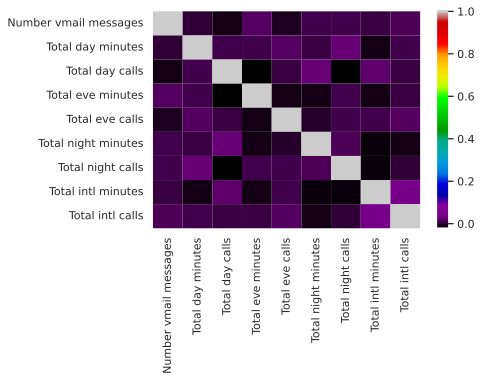

In [ ]:
corr_df = corr_df.drop(['Total day charge','Total eve charge','Total night charge','Total intl charge'], axis=1)
sns.heatmap(corr_df.corr(), cmap='nipy_spectral')
plt.ioff()

## 3.2 Categorical-Categorical (International Plan-Churn)





In [153]:
intr_churn_df = data[['International plan', 'Churn']]

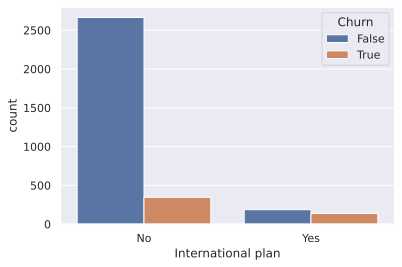

In [154]:
#international plan relation with churn
sns.set(font_scale=1)
sns.countplot(x='International plan', data=intr_churn_df, hue='Churn')
plt.ioff()

**An observation:** 
 when International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature.

## 3.3 Categorical-Categorical (Voice mail Plan - Churn)

In [150]:
voic_churn_df = data[['Voice mail plan','Churn']]

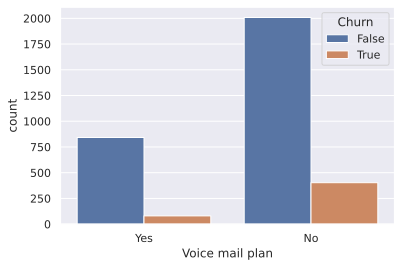

In [155]:
#voice plan relation with churn
sns.set(font_scale=1)
sns.countplot(x='Voice mail plan', data=voic_churn_df, hue='Churn')
plt.ioff()

**An observation:**   
The Churn rate is high when the Voice mail Plan is not enabled.Therefore it seems that customers wants voice mail feature. </li>


## 3.4 Numerical-Categorical (Customer service calls - Churn)

In [147]:
csc_df = data[['Customer service calls', 'Churn']]

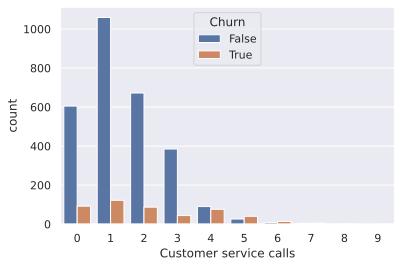

In [156]:
#customer service calls relation with churn
sns.set(font_scale=1)
sns.countplot(x = 'Customer service calls' ,  data = csc_df, hue='Churn')
plt.ioff()

**An observation:**  
The churn rate increases significantly after 2-3 calls to the customer service calls.



In [126]:
today_min = data.loc[data['Customer service calls']<8, ['Total day minutes', 'Customer service calls', 'Churn']]

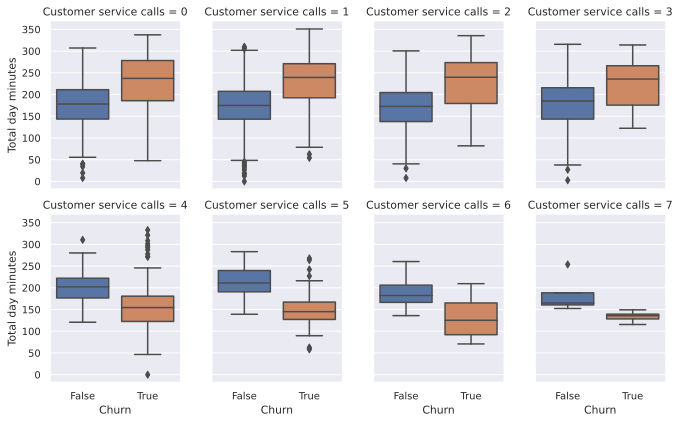

In [139]:
sns.set(font_scale=0.9)
sns.catplot(
    x='Churn',
    y='Total day minutes', data=today_min, kind='box', col='Customer service calls',
    col_wrap=4, aspect=0.8, height=3
)
plt.ioff()

From the above plots, we can notice that, starting with 4 calls, total day minutes may no longer be the main factor for customer churn. So, there might some other problems that also presponsible for the customers churn.

## 3.5 Quantitative - Categorical (Minutes-Churn)


In [145]:
dmin_ch_df = data[['Total day minutes','Total night minutes', 'Churn']]
dmin_ch_df2 = data[['Total eve minutes','Total intl minutes', 'Churn']]

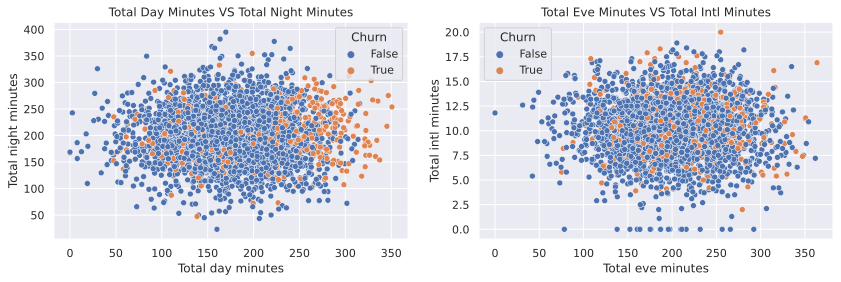

In [157]:
fig, ax = plt.subplots(figsize= (14, 4))
sns.set(font_scale=1)
#total day minutes vs total night minutes visualization
plt.subplot(1, 2, 1)
plt.title('Total Day Minutes VS Total Night Minutes')
sns.scatterplot(x='Total day minutes', y='Total night minutes' , data=dmin_ch_df, hue='Churn')

#total eve minutes vs total intl minutes visualization
plt.subplot(1, 2, 2)
plt.title('Total Eve Minutes VS Total Intl Minutes')
sns.scatterplot(x='Total eve minutes', y='Total intl minutes' , data=dmin_ch_df2, hue='Churn')
plt.ioff()

**An interesting observation:** on average, customers that discontinue their contracts are more active users of communication services in day as compare to other instance. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates and also if possible they should also introduce some special plans for day users. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

## 3.6 Quantitative-Categorical (States-Churn)

In [143]:
#State wise loyal and unloyal customers
stc_df = data[['State', 'Churn']]

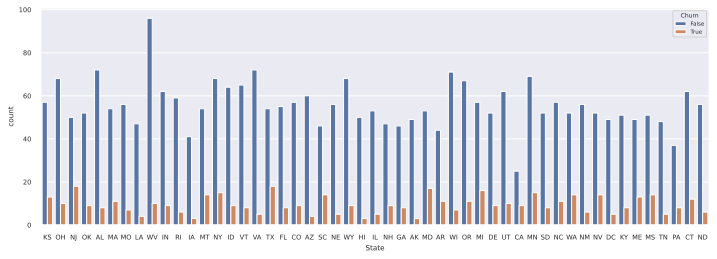

In [166]:
fig, ax = plt.subplots(figsize=(12,4))   
sns.set(font_scale=0.5)
sns.countplot(x='State', data=stc_df, hue='Churn')
plt.ioff()

In [ ]:
pd.crosstab(data['State'], data['Churn'])

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


In [141]:
# state wise churn rate
st_data = data.groupby(['State'])['Churn'].mean().reset_index()
st_data['Churn'] = round(st_data['Churn']*100,1)
st_data.rename(columns={'Churn': 'Churn Rate'} , inplace=True)
st_data = st_data.sort_values(by='Churn Rate', ascending=False)
st_data = st_data.reset_index(drop=True)

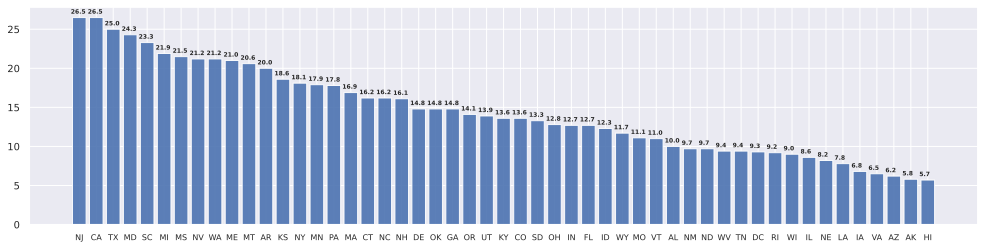

In [142]:
fig, ax = plt.subplots(figsize=(17,4))
plt.rc('xtick', labelsize=8)   
  
ax.bar(st_data['State'], st_data['Churn Rate'], alpha=0.9)
for i,v in enumerate(st_data['Churn Rate']):
  ax.text(i-0.5, v+0.5, str(v), fontsize=6, fontweight ='bold')

**An Observation:**  
The states NJ(New Jersey) and CA(California) have highest churn rate of grater then 26% and HI(Hawaii) have lowest churn rate of less the 6%


# Conclusion :
*   Most of the Customers who disconnect their connections are very active user of communication service.
*   The rate of Churn more in those customers that enable International Plan as compare to those customers that doesn’t enable the International plan.
* 	It seems that the rate of churn in those customers that doesn’t enable any Voice mail plan are more.
*	Most of the customers problems are solved in 2-3 calls but after 2-3 calls the customers that having still any problem then they seems unsubscribe their plan.

# Recommendations :
Since most of the customer churn come up by a communication service, so I think company will need to undertake additional economic analysis to find out whether such measures would be beneficial. There is also required some Improvement in international service and also require some new low budget Voice mail and International plans.
It seems that the customer's queries are not solved even after 4 Customer Service calls. So, I highly recommend you to improve your Customer Service Calls.
